### Import packages 


In [26]:
import pandas as pd 
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

### Variables 

In [27]:
PROJ = 'M1 Task 1'
doc = 'impurities_24-1.csv'
categories = ['Day', 'Filtration', 'Surfactant', 'Sonication'] #Independent
response = 'response' #Dependent

### Dirs

In [28]:
cwd = os.getcwd()
print("Current cwd:", cwd)
cwd = cwd.replace("\\", "/")
projdir = cwd + '/Projects/' + PROJ + '/'
resultsdir = projdir + 'ANOVA/'

Current cwd: /Users/kristianh/Documents/Skole/Chemometrics/M1


### Work folders 

In [29]:
folds = [projdir,resultsdir]
for fold in folds:
    if not os.path.exists(fold):
        os.makedirs(fold)

### Data

In [30]:
fil = projdir + doc 
df = pd.read_csv(fil, sep="\t")
print(df)

    day  filtration  surfactant  sonication  response
0     1          25          20          10       261
1     1          25          10           0       273
2     1          25          20           0       243
3     1          25          30           0       249
4     1          25          30          10       246
5     1          25          10          10       244
6     1          50          30           0       255
7     1          50          20          10       226
8     1          50          10          10       239
9     1          50          30          10       254
10    1          50          10           0       288
11    1          50          20           0       296
12    1          75          30          10       221
13    1          75          20          10       279
14    1          75          10           0       280
15    1          75          20           0       293
16    1          75          30           0       229
17    1          75         

### ANOVA

/Users/kristianh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


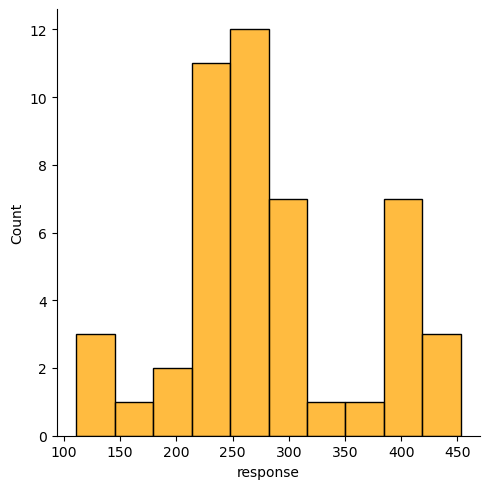

In [31]:
Bins = 10 
sns.displot(df['response'],color='orange',bins=Bins)

Text(0.5, 1.0, 'QQ Plot')

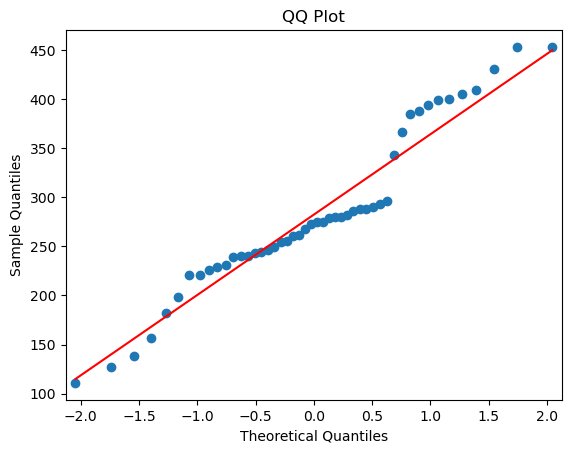

In [32]:
sm.qqplot(df['response'],line='s')
plt.title('QQ Plot')


In [34]:
mystring = 'response ~ (day + filtration + surfactant + sonication) ** 4'

model = ols(mystring, data = df).fit()
anova_table = sm.stats.anova_lm(model, typ =2)
print(anova_table)

                                             sum_sq    df           F  \
day                                    20049.187500   1.0   22.082680   
filtration                            153773.437500   1.0  169.369939   
surfactant                               136.125000   1.0    0.149932   
sonication                              2282.520833   1.0    2.514026   
day:filtration                        111931.204167   1.0  123.283849   
day:surfactant                           450.000000   1.0    0.495641   
day:sonication                            58.520833   1.0    0.064456   
filtration:surfactant                     78.400000   1.0    0.086352   
filtration:sonication                    270.937500   1.0    0.298417   
surfactant:sonication                     18.000000   1.0    0.019826   
day:filtration:surfactant                366.025000   1.0    0.403149   
day:filtration:sonication                  4.004167   1.0    0.004410   
day:surfactant:sonication               1378.125000